<a href="https://colab.research.google.com/github/kiuwuw/Pembelajaran-Mesin-Rahmad-Dwirizki-Olders-2211533005/blob/main/cat_and_dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Berikut Merupakan Code untuk menimport dataset dari kaggle

In [22]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
# letak file atau link tempat data akan di import atau di panggil
DATA_SOURCE_MAPPING = 'cat-and-dog-classifier:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2839522%2F4896521%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240619%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240619T020252Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D18f21f6f052a5b5d5051ad8b7b44509b1c1a5c1ce2b8786e22134eade9f6cd2b3c6a3d03994d9d3781874e0373a69b567e6860fbc39a1b15c033202276b8d595c5c9f99e0f7d7c3be0058d9ffa11e3353333b6927d12d4f336d12af3190a54b65fcd68e20e00b1fa3353f46fa8b2bf94d48d01999c8ed47c1be8e0abb94d58ebf9a5ee706d0a81b5820ccaa2021724927ef2c2a1b6f9c2dfe83c7cbf99c9525d74a59d23baccd796050a4a0e2e2f68bdd3080c0612746aec6de65a0daf6710d22a8cdd4c7a2e080968258be9132ce09908a3f42c7525d99eca00b1fc567bad15181f1f37b2274464c9d419704d4fe7e0849466998a82c0cda8bdaf83f4206a37'



KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 131977842 bytes downloaded
Downloaded and uncompressed: cat-and-dog-classifier
Data source import complete.


Import Numpy dan Pandas untuk di gunakan nanti
dan juga memimport data dari kaggle/input

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog-classifier/data/dog_test2.jpg
/kaggle/input/cat-and-dog-classifier/data/cat_test.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images143.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images370.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images388.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images435.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images121.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images476.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images203.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images53.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images455.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/gettyimages-917452888-edit_custom-c656c35e4e40bf22799195af846379af6538810c-s1100-c50.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images177.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images125.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/image31.jpeg
/kaggle/input/cat-and-dog-classifier

import tensorflow dan lain sebagainya untuk di gunakan nanti

In [28]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import imghdr

%matplotlib inline
# berguna untuk menampilkan plot langsung di bawah kodingan

import data set dan kita assign ke dalam variable data


In [29]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/cat-and-dog-classifier/data')

Found 1152 files belonging to 2 classes.


data awal tadi di ubah menjadi iterator numpy

In [30]:
data_iterator = data.as_numpy_iterator()

In [31]:
batch = data_iterator.next()

pada plot di bawah kita mengatur 1 sebagai dog dan 0 sebagai kucing


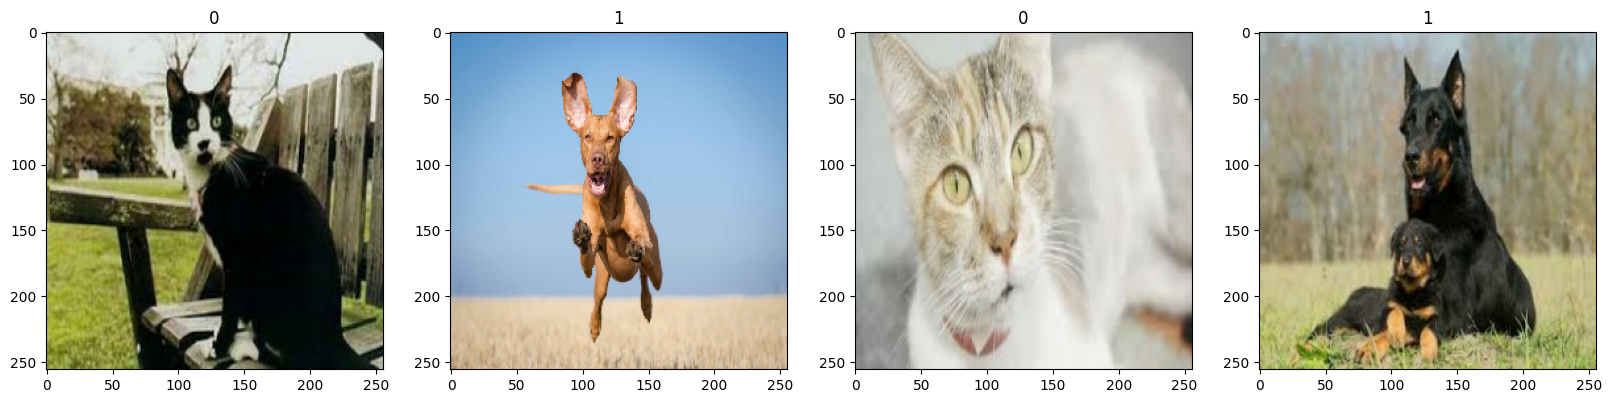

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Dog = 1

Cat= 0

# Scale Data

In [33]:
data = data.map(lambda x,y: (x/255, y))

In [34]:
data.as_numpy_iterator().next()

(array([[[[0.259038  , 0.36492035, 0.14923407],
          [0.26403186, 0.3699142 , 0.1555147 ],
          [0.27487746, 0.3807598 , 0.17291667],
          ...,
          [0.2627451 , 0.23137255, 0.18039216],
          [0.2627451 , 0.23465073, 0.17383578],
          [0.2664522 , 0.23900123, 0.17625612]],
 
         [[0.25271904, 0.35860142, 0.14291513],
          [0.2580585 , 0.36394083, 0.14954133],
          [0.27008888, 0.37597123, 0.1681281 ],
          ...,
          [0.2627451 , 0.23137255, 0.18039216],
          [0.26450583, 0.23641148, 0.17559654],
          [0.2665674 , 0.23911642, 0.17637132]],
 
         [[0.24368873, 0.34957108, 0.13567708],
          [0.24917896, 0.35506132, 0.14216003],
          [0.2614813 , 0.36736366, 0.15952052],
          ...,
          [0.26364124, 0.23226869, 0.1812883 ],
          [0.2661703 , 0.23807594, 0.177261  ],
          [0.26666668, 0.23921569, 0.1764706 ]],
 
         ...,
 
         [[0.74253374, 0.5254902 , 0.4861765 ],
          [0.73984

# Split Data


untuk melatih data kita perlu membagi data menjadi 3 bagian test training dan validasi

In [35]:
train_size = int(len(data)*.7) # 70 persen untuk training
val_size = int(len(data)*.2) # 20 persen untuk validasi
test_size = int(len(data)*.1) # 10 persen untuk testing

disini kita dapat melihat ukuran dari dataset untuk training

In [36]:
train_size

25

di sini kita mengambil dan membuang data yang tidak di gunakan, misalkan train mengambill sebanyak train size, val tidak mengambil yang train dan mengambil sebanyak validasi dan seterusnya

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

menampilkan informasi seputar variabel atau data **train**

In [38]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

mengimport model sequential


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

mengatur model

In [41]:
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(64, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(128, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(256, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(512, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 16)       

# Train

In [44]:
logdir='logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [46]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
print(hist.history) # this will print a dictionary object, now you need to grab the metrics / score you're looking for

# if your score == 'acc', if not replace 'acc' with your metric

best_score = max(hist.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")

Epoch 1/20
25/25 [==============================] - 79s 3s/step - loss: 0.8302 - accuracy: 0.5025 - val_loss: 0.6896 - val_accuracy: 0.5446
Epoch 2/20
25/25 [==============================] - 65s 2s/step - loss: 0.6929 - accuracy: 0.5325 - val_loss: 0.6836 - val_accuracy: 0.5848
Epoch 3/20
25/25 [==============================] - 63s 2s/step - loss: 0.6764 - accuracy: 0.6012 - val_loss: 0.6568 - val_accuracy: 0.7054
Epoch 4/20
25/25 [==============================] - 66s 3s/step - loss: 0.6402 - accuracy: 0.6700 - val_loss: 0.6537 - val_accuracy: 0.6920
Epoch 5/20
25/25 [==============================] - 65s 2s/step - loss: 0.5932 - accuracy: 0.7163 - val_loss: 0.5918 - val_accuracy: 0.6607
Epoch 6/20
25/25 [==============================] - 65s 3s/step - loss: 0.4766 - accuracy: 0.7925 - val_loss: 0.5178 - val_accuracy: 0.7411
Epoch 7/20
25/25 [==============================] - 65s 2s/step - loss: 0.3681 - accuracy: 0.8475 - val_loss: 0.5365 - val_accuracy: 0.7411
Epoch 8/20
25/25 [==

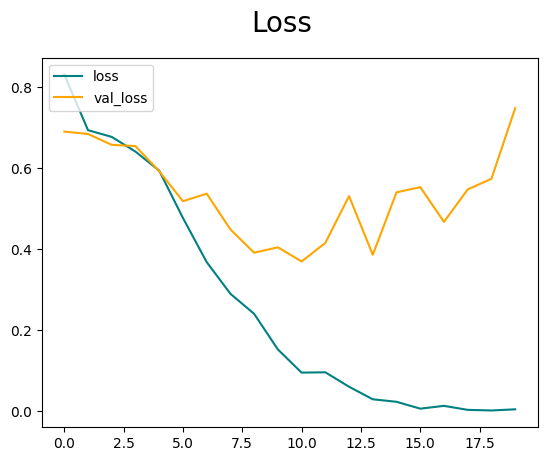

In [47]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

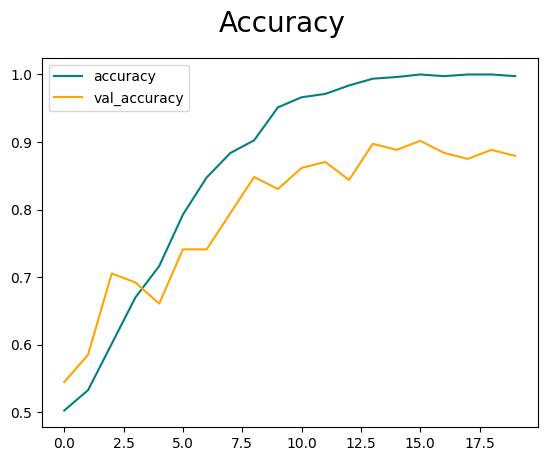

In [48]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [51]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 586ms/step


In [52]:
print(f"Precision: {pre.result().numpy()} , Recall: {re.result().numpy()}, BinaryAccuracy: {acc.result().numpy()}")

Precision: 0.7659574747085571 , Recall: 0.8999999761581421, BinaryAccuracy: 0.84375


# Test

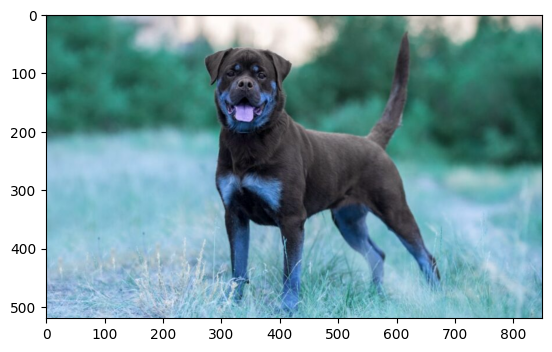

In [53]:
img = cv2.imread('/kaggle/input/cat-and-dog-classifier/data/dog_test2.jpg')
plt.imshow(img)
plt.show()

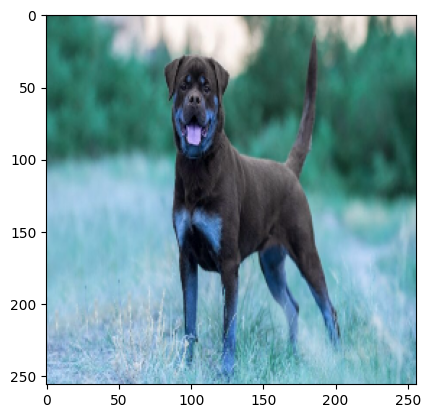

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 105ms/step


In [56]:
yhat

array([[0.9999918]], dtype=float32)

In [57]:
if yhat > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


Thats All for now :D
